# Определение факторов влияющих на успешность игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**
* Выявить актуальный период в данных для построения прогноза на 2017 год
* Определить платформы с лучшими и худшими перспективами роста
* Определить факторы влияющие на продажи игр

**Ход исследования**
* Изучить имеющиеся данные
* Подготовить данные к работе
* Провести ИА данных
* Составить портрет пользователей по регионам
* Проверить гипотезы о уровне пользовательского рейтинга на платформах

In [1]:
#подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

## Изучаем имеющиеся данные

In [2]:
#Загружаем датасет
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

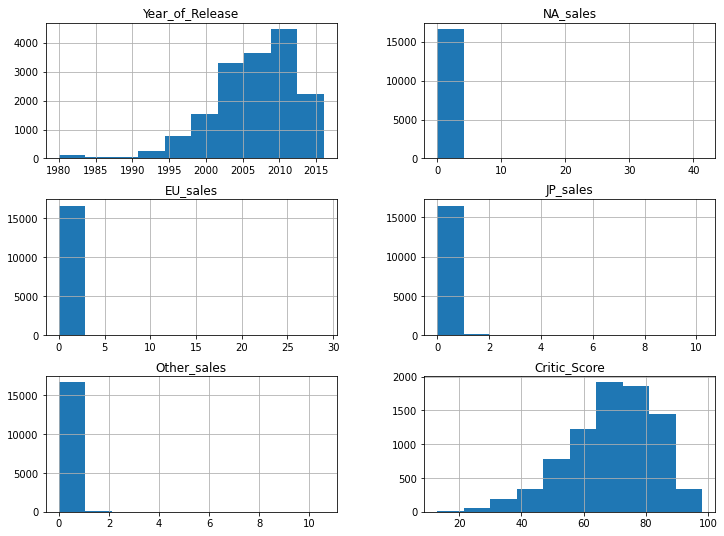

In [7]:
data.hist(figsize=(12,9))

**Результаты ознакомления:**
* Имеются пропуски в данных
* Нужно исправить регистр названия стобцов
* Исправить тип данных:год выпуска(заменим на целочисленный),оценка пользователей(заменим на вещественный)
* В продажах по регионам имеются большие значения, но ошибкой считать это не буду, т.к. таковые есть в каждом регионе и существование бестселлеров никто не отрицает.(всегда есть медиана спасающая от малочисленных выбросов)

## Подготовим данные для дальнейшей работы с ними

In [8]:
#Проверим дупликаты
data.duplicated().sum()

0

In [9]:
#Приведем названия столбцов к нормальной форме
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В парамерте оценки пользователей, есть значение 'tbd', скорее всего это абревиатура 'to be determined',
то есть будет определено.

In [10]:
data.query('user_score =="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Никакой закономерности не наблюдается, приравняем значение к пропускам, но сразу для удобства в дальнейшей работе заменим на нейтральное значение -1, а не np.NaN .(Преобразование в вещественный тип).

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

Разберемся с пропусками

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
#пропуски названия игр
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можно заметить, что это старые игры у которых о которых отсутствует половина информации, предлагаю удалить их, 2 из 16715 небольшая потеря

In [14]:
#Избавляемся от пропусков в названии игр и жанре
data.dropna(subset=['name'], inplace=True)

In [15]:
#Пропуски в столбце "год выпуска"
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В некоторых играх год выпуска указан в конце, но извлечениее этих данных будет достаточно громоздким и не решит всю проблему.

Так же не наблюдается какой либо закономерности по платформе, жанру и прочим показателям.

Заменю пропущенные значения на -1, для сохранения остальных данных о играх и возможности изменить тип данных.

In [16]:
#Изменяем значение пропусков
data['year_of_release'] = data['year_of_release'].fillna(-1)
#Изменим тип данных
data['year_of_release'] = data['year_of_release'].astype(int)

Остались пропуски в оценках критиков и зрителей, а так же возрастная категория.

Оценки критиков нисчем не коорлериуют, по этому так же как и в случае с годом заменим, на значение -1.

Оценки пользователей так же заменим на -1, но к этим пропускам еще вернемся.


In [17]:
#заменяем пропущенные значения на -1.
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype(float)

Теперь можем посмотреть связаны ли как либо 

In [18]:
data.loc[data['user_score']>0].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,0.011377,0.015467,0.022014,0.013641,-0.017349,0.002257
na_sales,0.011377,1.000000,0.836147,0.465372,0.722970,0.175898,0.086521
eu_sales,0.015467,0.836147,1.000000,0.517259,0.713893,0.157212,0.055205
jp_sales,0.022014,0.465372,0.517259,1.000000,0.392956,0.124513,0.125650
other_sales,0.013641,0.722970,0.713893,0.392956,1.000000,0.133222,0.057157
critic_score,-0.017349,0.175898,0.157212,0.124513,0.133222,1.000000,0.418651
user_score,0.002257,0.086521,0.055205,0.125650,0.057157,0.418651,1.000000


Какой либо значимой корреляции у оценок пользователей не наблюдается, оставим эти значения как есть.

Можно предположить, что пропущен какое-то конкретное значение рейтинга, проверим посмотрев уникальные значения параметра, заодно посмотрим правильность заполнения данных.

In [19]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Нет, в категории присутствуют, прочих закономерностей тоже не наблюдаетсчя, выставлять какой либо конкретный рейтинг например "E" считаю не целесообразным для дальнейшей работы, поэтому заменю пропущенные значение на "not_defined"

In [20]:
#замена пропущенных значений
data['rating'] = data['rating'].fillna('not_defined')

In [21]:
#Посчитаем общие продажи по миру
data['word_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

**Итоги подготовки: **
* пропуски названия и жанра скорее всего связаны с тем, что игры вышли давно и таких данных просто нет
* остальные же пропуски могли возникнуть как и при некачественном сборе информации самим интернет магазином (часто отсуствовали сразу 3 значения), так и при переносе/сборе информации
* добавили параметр общих продаж по миру
* Удалили строки с пропусками в названии игры и жанре, всвязи с тем что они устарели, и прочих полезных данных у них нет
* Заменили значение tbd(to be determined) на нейтральное значение -1, для изменения типа данных столбца
* Изменили типы данных у параметров: год выпуска/int, оценки пользователей/float
* Заменили пропуски в параметрах(год выпуска,оценка пользователей,оценка критиков, возрастной рейтинг) на нейтральные значения

## Проведем исследовательский анализ данных


Посмотрим выпуск игр в разные годы, за весь имеющийся период.

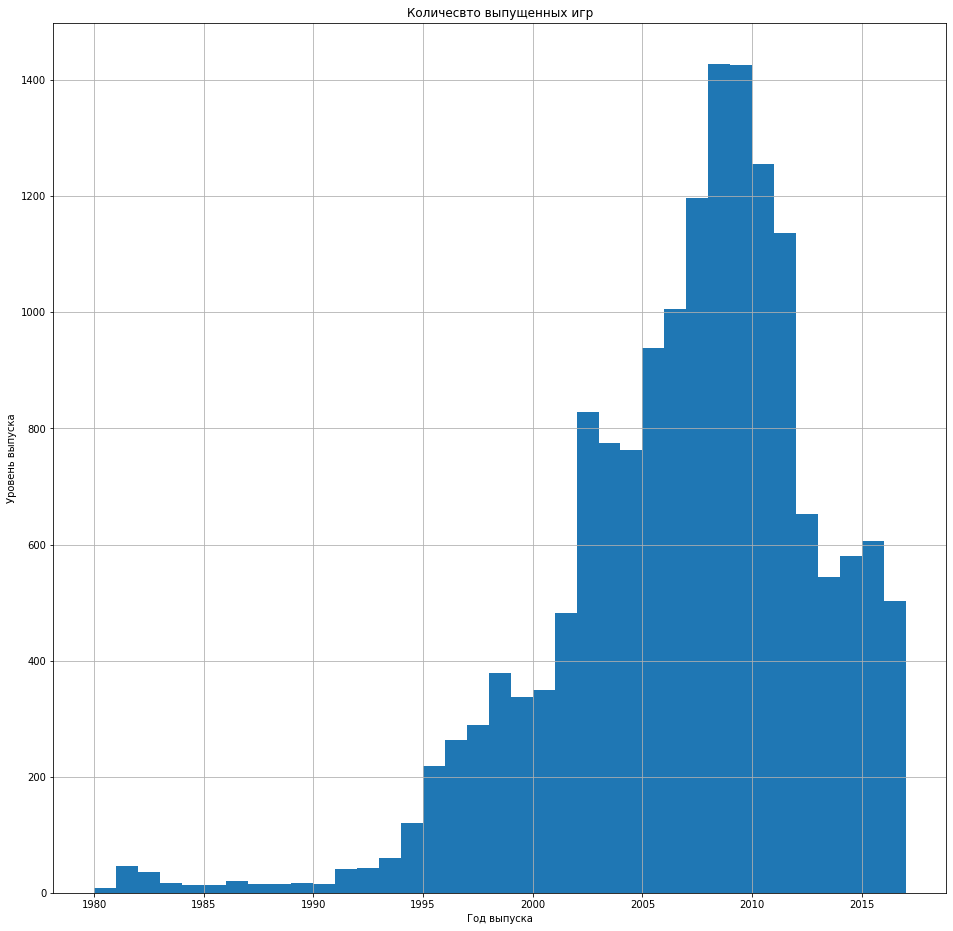

In [33]:
data['year_of_release'].hist(bins=37,range=(1980,2017), figsize=(16, 16))
plt.title('Количесвто выпущенных игр')
plt.ylabel('Уровень выпуска')
plt.xlabel('Год выпуска');

- В период с 1980 по 1991  год выпуск игры был на очень низком уровне
- С 1991 до до 2002 шел достаточно развоменый рост выпуска
- После резкого всплеска небольшое снижение выпуска  2002-2005
- 2005-2011 расцвет выпуска 
- После резкого падения в 2011 неравномерное, но все же снижение выпуска

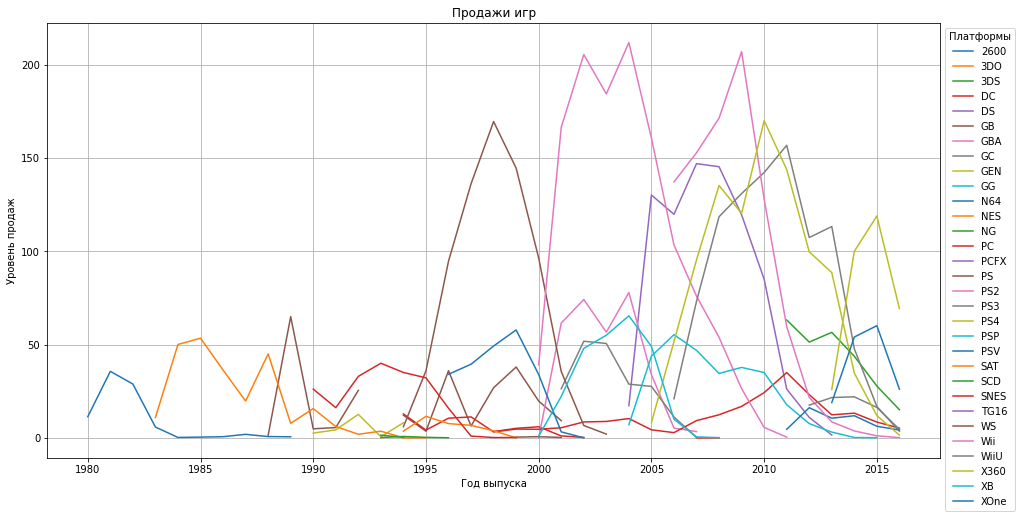

In [23]:
salses_word = data.query('year_of_release>0').pivot_table(index='year_of_release', columns='platform',
                                            values='word_sales',aggfunc=("sum"))
salses_word.plot(grid=True,figsize=(16, 8))
plt.title('Продажи игр')
plt.ylabel('Уровень продаж')
plt.xlabel('Год выпуска')
plt.legend(bbox_to_anchor=(1, 1),title='Платформы');


По такому пестрому графику сложно, что либо конкретизировать, четко прослеживается несколько вещей:
- У большинства платформ срок жизни +-6 лет
- PC стабильно держится, но на невысоком уровне.
- Можно выделить две группы платформ(условно), с высоки продажами взлетающими в верхнюю часть графика, примерно 7, и с низкими продажами даже на пиковых значениеях их показатели не высоки.
- Вышедшие в 2013 году PS4 и XOne  сейчас являются крупнейшими игроками рынка.


Выделим популярные платформы на отдельный график, так же более точно, а не на глаз посчитаем средний срок жизни 1 платформы.

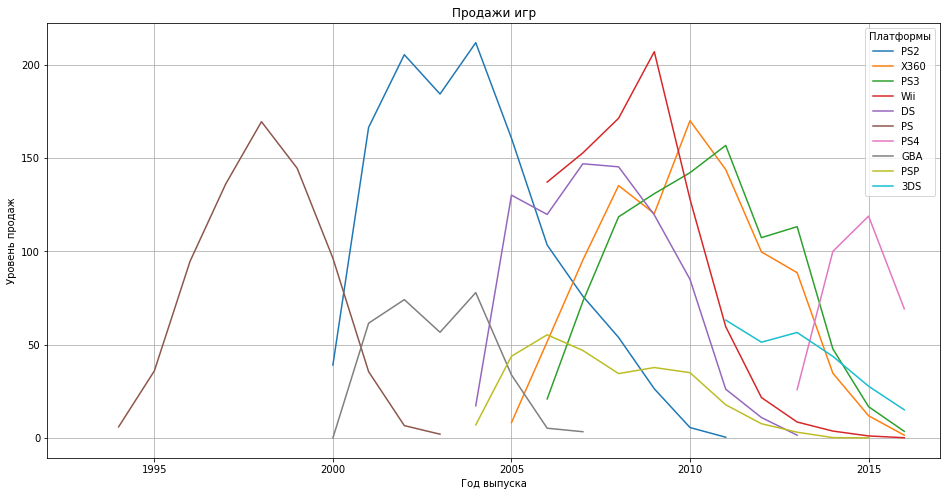

In [24]:
salses_word[salses_word.sum().sort_values(ascending=False).head(10).index].plot(grid=True,figsize=(16, 8))
plt.title('Продажи игр')
plt.ylabel('Уровень продаж')
plt.xlabel('Год выпуска')
plt.legend(bbox_to_anchor=(1, 1),title='Платформы')
plt.xlim(1992, 2017);

Хорошо видно, что расширение рынка не ожидается, поскольку в последнее время даже среди наиболее продаваемых плотформ заметен спад.

Посчитаем средний срок жизни платформ, возьмем медиану, т.к. наличие бессмертного ПК сдвинет среднее в большую сторону.

In [25]:
#медианное значение срока жизни платформы
salses_word.count().median()

7.0

Для дальнейшей работы необходимо определить актуальный период, судя по графикам выпуска игр сейчас идет 5 год после резкого падения и изменения рынка, сужаем актуальный период до 2011-2016, в этот отрезок времени рынок продаж тоже притерпивал изменения, с рынка ушло 2 когда то крупные платформы(DS,PSP) в 2013 и 2015 годах, а так же в 2013 появились новые платформы. 

Из всего вышесказанного, сделаем вывод, что после 2013 года крупных потрясений рынка не происходило, кроме ухода PSP, но его показатели с 2013 и так были одними из самых низких, по этому возмем актуальный период с 2013 года, срок жизни новых крупных платформ еще тоже не должен закончится.

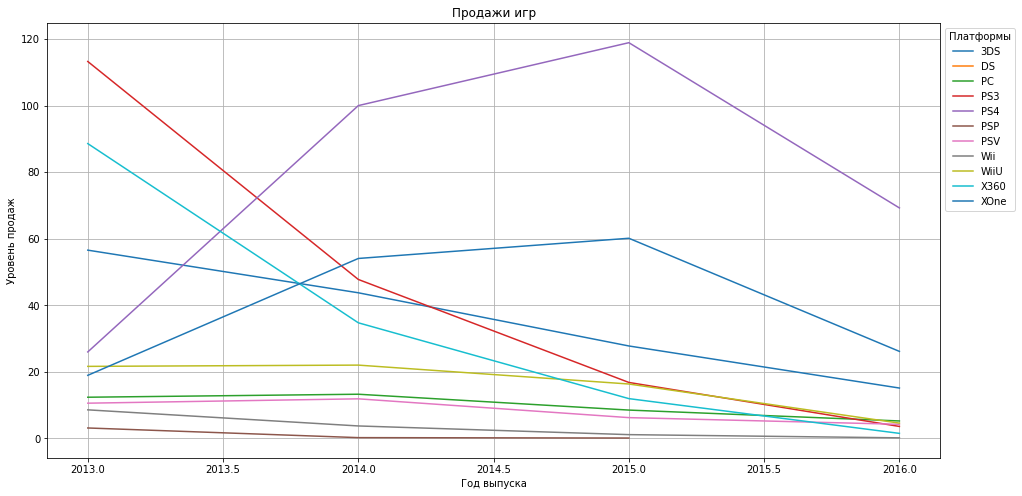

In [34]:
salses_word_2012 = data.query('year_of_release>2012').pivot_table(index='year_of_release', columns='platform',
                                            values='word_sales',aggfunc=("sum"))
salses_word_2012.plot(grid=True,figsize=(16, 8))
plt.title('Продажи игр')
plt.ylabel('Уровень продаж')
plt.xlabel('Год выпуска')
plt.legend(bbox_to_anchor=(1, 1),title='Платформы');

- PSP ушли с рынка.

- XOne,PS4,3DS  являются явными фаворитами продаж

- Х360 и PS3 резко теряют популярность и скорее всего доживают последние годы

- Отдельно можно выделить ПК, хоть тренд на снижение интереса к играм, его аудитория является наиболее стабильной.


Дальше всю работу будем проводить с данными за актуальный период, выделим новый фрейм данных.

In [26]:
data_actual = data.query('year_of_release>2012')

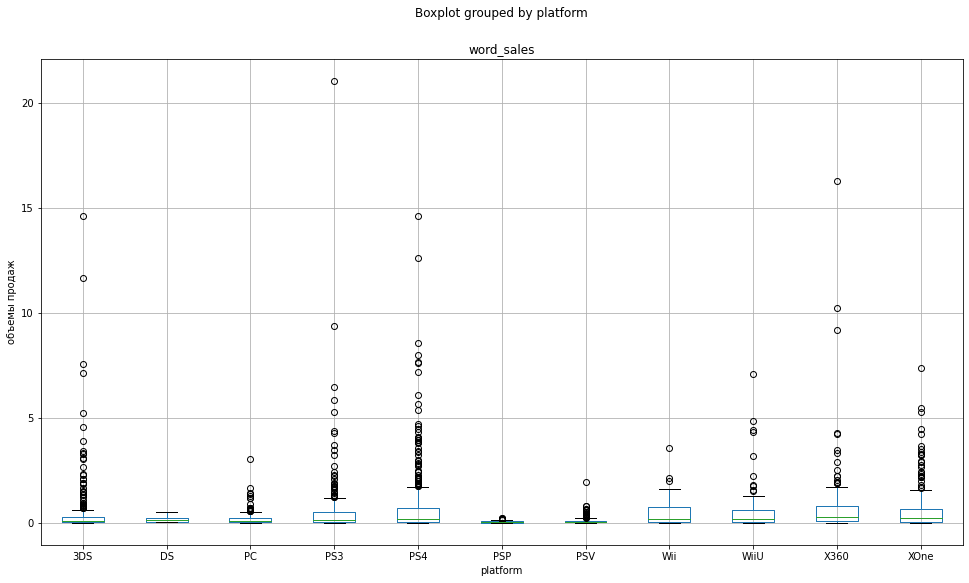

In [63]:
data_actual.boxplot('word_sales', by='platform',figsize=(16,9));
plt.title('продажи по миру');
plt.ylabel('объемы продаж');

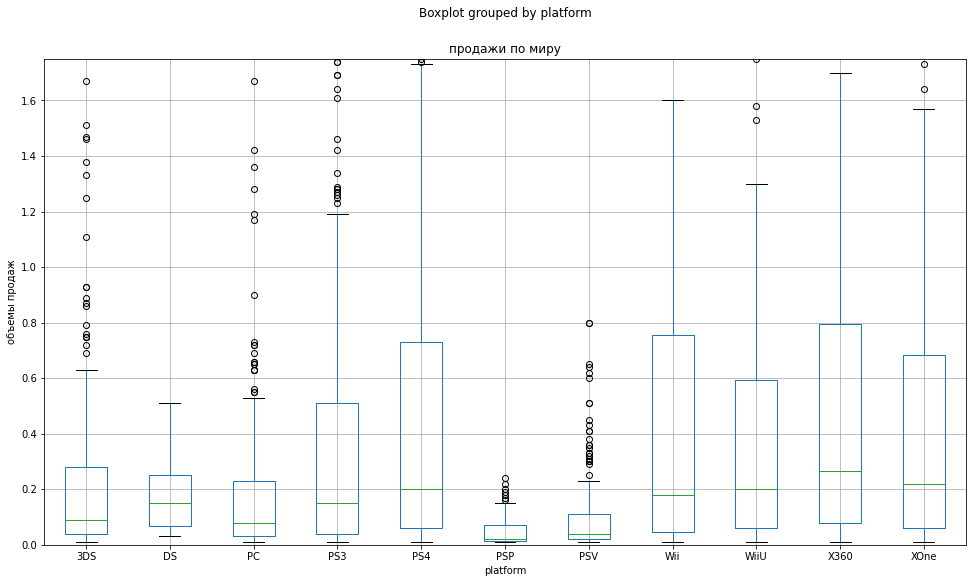

In [64]:
data_actual.boxplot('word_sales', by='platform',figsize=(16,9));
plt.ylim(0, 1.75)
plt.title('продажи по миру')
plt.ylabel('объемы продаж');

Cудя по графикам у всех платформ большинство игр продается примерно на одном уровне, причем относительно своих же игр довольно низком,при этом почти у всех, кроме DS, есть определенный список наиболее удачно продаваемых игр, сильно превосходящих общую выпущенную массу.
У PS4 и PS3 игры чаще становятся наиболее продаваемыми относительно общего выпуска.
Платформы серии X имеют самые высокие средние продажи неа 1 выпущенную игру,PS3/4 и Wii/U так же имеют довольно высокие показатели в этом смысле, но не дотягивают.

Рассмотрим как влияют на продажи внутри одной игры отзывы пользователей и критиков.

In [48]:
#Напишем две функции для отзывов пользователей и отзывов критиков, т.к. платформ много, а метод оценки одинаков.
def user_corr_and_plot(data, platform):
    data_u = data.loc[(data['platform'] == platform) & (data['user_score'] != -1)]
    data_u.plot(kind='scatter', x='user_score', y='word_sales',title=platform)
    data_c = data.loc[(data['platform'] == platform) & (data['critic_score'] != -1)]
    data_c.plot(kind='scatter', x='critic_score', y='word_sales',title=platform)
    return ('корреляция продаж с оценкой пользователей:',data_u["user_score"].corr(data_u["word_sales"]),'корреляция продаж с оценкой критиков:',data_c["critic_score"].corr(data_c["word_sales"]))


In [49]:
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

('корреляция продаж с оценкой пользователей:',
 0.0023944027357566925,
 'корреляция продаж с оценкой критиков:',
 0.3342853393371919)

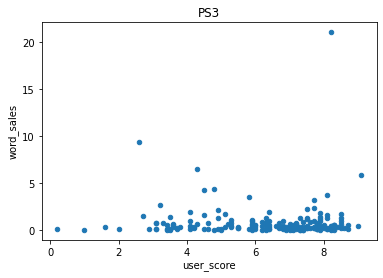

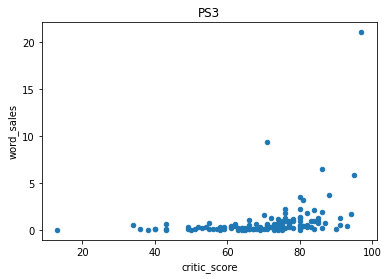

In [65]:
user_corr_and_plot(data_actual,"PS3")

('корреляция продаж с оценкой пользователей:',
 -0.011742185147181342,
 'корреляция продаж с оценкой критиков:',
 0.3503445460228664)

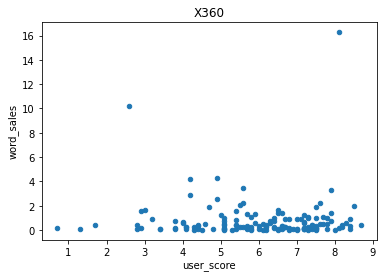

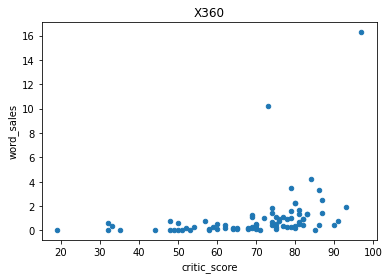

In [66]:
user_corr_and_plot(data_actual,"X360")

('корреляция продаж с оценкой пользователей:',
 -0.031957110204556376,
 'корреляция продаж с оценкой критиков:',
 0.40656790206178095)

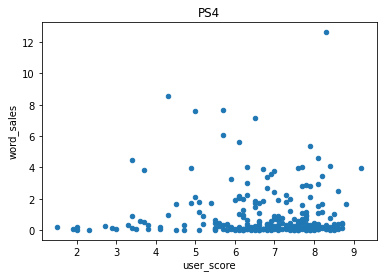

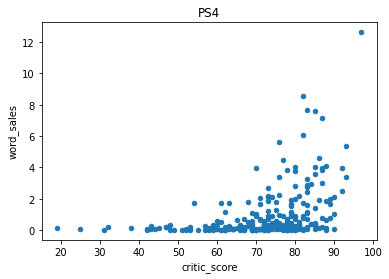

In [67]:
user_corr_and_plot(data_actual,"PS4")

('корреляция продаж с оценкой пользователей:',
 0.24150411773563016,
 'корреляция продаж с оценкой критиков:',
 0.3570566142288103)

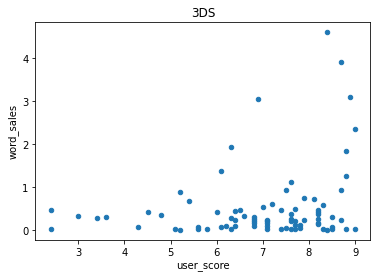

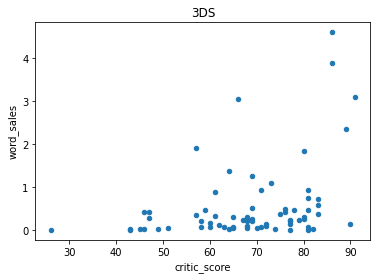

In [68]:
user_corr_and_plot(data_actual,"3DS")

('корреляция продаж с оценкой пользователей:',
 -0.06892505328279414,
 'корреляция продаж с оценкой критиков:',
 0.4169983280084017)

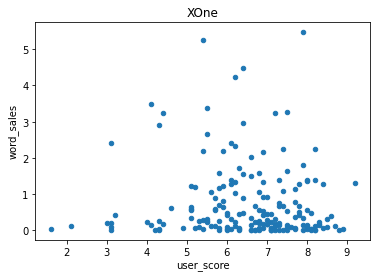

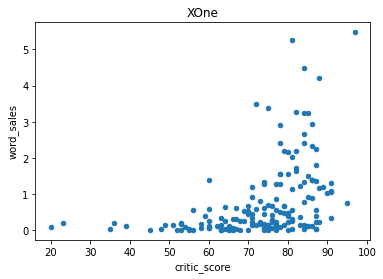

In [69]:
user_corr_and_plot(data_actual,"XOne")

('корреляция продаж с оценкой пользователей:',
 0.4193304819266187,
 'корреляция продаж с оценкой критиков:',
 0.3764149065423912)

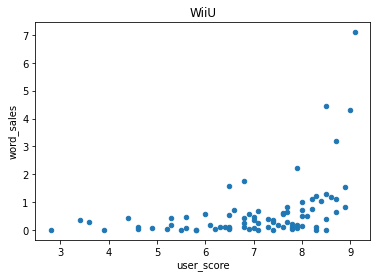

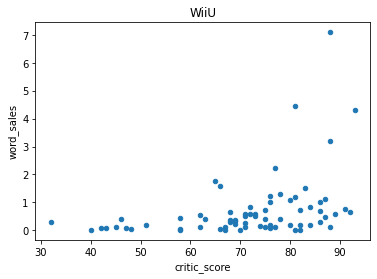

In [70]:
user_corr_and_plot(data_actual,"WiiU")

('корреляция продаж с оценкой пользователей:',
 0.6829417215362368,
 'корреляция продаж с оценкой критиков:',
 nan)

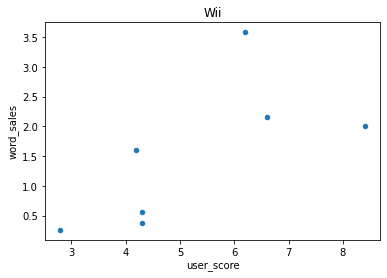

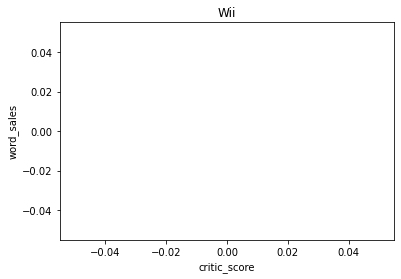

In [71]:
user_corr_and_plot(data_actual,"Wii")

('корреляция продаж с оценкой пользователей:',
 -0.0938418695247674,
 'корреляция продаж с оценкой критиков:',
 0.19603028294369382)

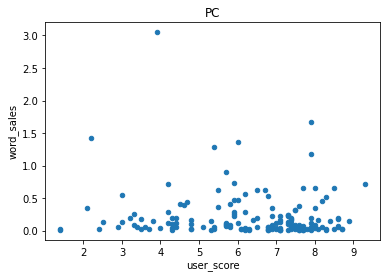

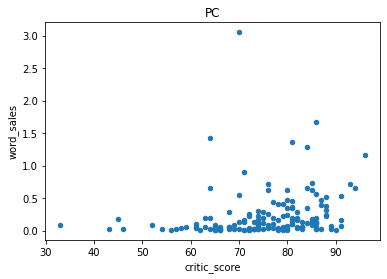

In [72]:
user_corr_and_plot(data_actual,"PC")

('корреляция продаж с оценкой пользователей:',
 0.0009424723319108626,
 'корреляция продаж с оценкой критиков:',
 0.2547423503068656)

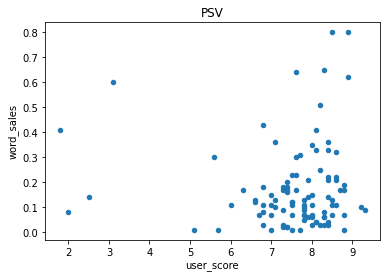

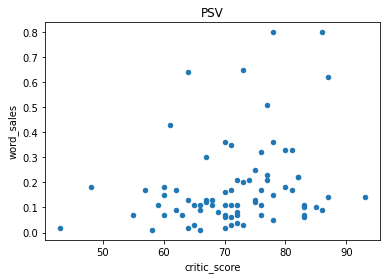

In [73]:
user_corr_and_plot(data_actual,"PSV")

Корреляция с оценками отсутствует или незначительная, однако по графикам мы можем сказать, что чаще лучше продаются игры с высоким рейтингом.

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


('корреляция продаж с оценкой пользователей:',
 nan,
 'корреляция продаж с оценкой критиков:',
 nan)

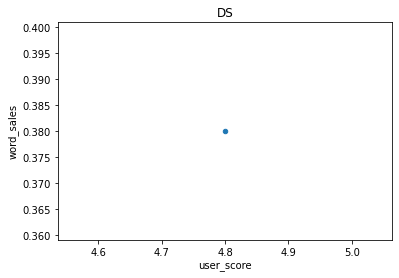

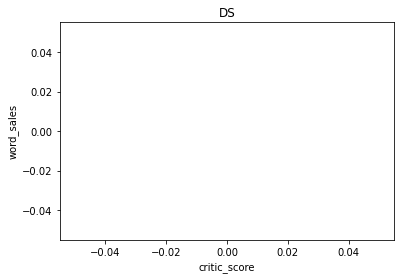

In [74]:
user_corr_and_plot(data_actual,"DS")

In [75]:
data_actual[data_actual['platform']=='DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,word_sales
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.0,0.04,-1.0,-1.0,not_defined,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.0,0.03,-1.0,4.8,E10+,0.38
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.0,0.02,-1.0,-1.0,E,0.21
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.0,0.01,-1.0,-1.0,E,0.18
9753,Moshi Monsters: Katsuma Unleashed,DS,2013,Action,0.00,0.11,0.0,0.01,-1.0,-1.0,E,0.12
11973,The Croods: Prehistoric Party!,DS,2013,Misc,0.03,0.04,0.0,0.01,-1.0,-1.0,not_defined,0.08
14353,Turbo: Super Stunt Squad,DS,2013,Sports,0.00,0.03,0.0,0.00,-1.0,-1.0,E,0.03
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.0,0.00,-1.0,-1.0,E10+,0.03


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


('корреляция продаж с оценкой пользователей:',
 -0.9999999999999999,
 'корреляция продаж с оценкой критиков:',
 nan)

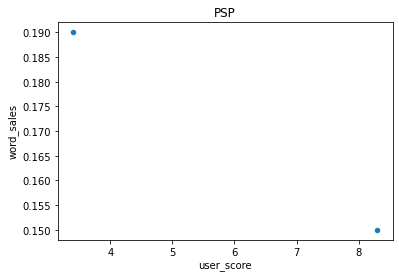

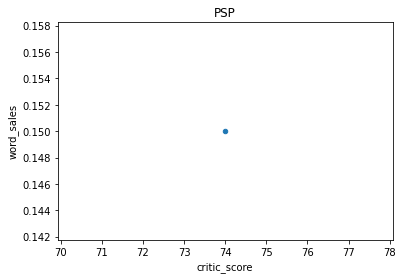

In [76]:
user_corr_and_plot(data_actual,"PSP")

In [77]:
data_actual[data_actual['platform']=='PSP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,word_sales
6915,God Eater 2,PSP,2013,Role-Playing,0.0,0.00,0.24,0.00,-1.0,-1.0,not_defined,0.24
7126,Sword Art Online: Infinity Moment,PSP,2013,Role-Playing,0.0,0.00,0.22,0.00,-1.0,-1.0,not_defined,0.22
7647,Pro Yaky? Spirits 2013,PSP,2013,Sports,0.0,0.00,0.20,0.00,-1.0,-1.0,not_defined,0.20
7875,FIFA 14,PSP,2013,Sports,0.0,0.15,0.00,0.04,-1.0,3.4,E,0.19
8134,Toukiden: The Age of Demons,PSP,2013,Action,0.0,0.00,0.18,0.00,-1.0,-1.0,not_defined,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16603,Satomi Hakkenden: Hachi Tamanoki,PSP,2014,Adventure,0.0,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01
16609,Romeo Vs. Juliet,PSP,2013,Adventure,0.0,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01
16612,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,0.0,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01
16637,Onigokko! Portable,PSP,2013,Adventure,0.0,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01


У PSP и DS не нашлось данных позволяющих сделать, выводы однако считать, что они как то выбиваются из общей тенденции нет никаких оснований.

Text(0.5, 0, 'жанр')

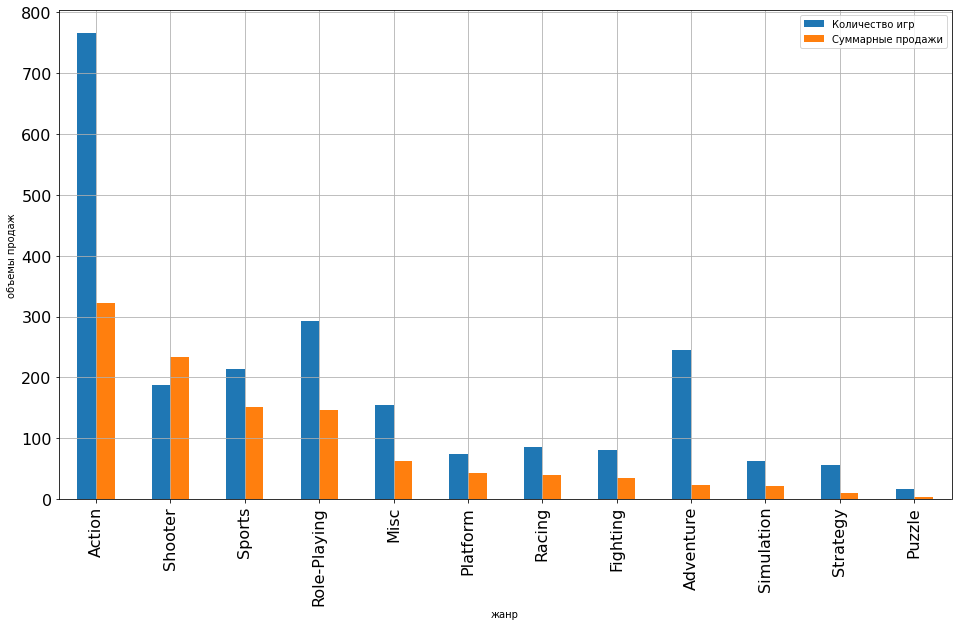

In [44]:
data_actual.pivot_table(index='genre', values='word_sales', aggfunc=('count', 'sum')).sort_values('sum', ascending=False)\
.plot(kind='bar', figsize=(16, 9), fontsize=(16), grid=True)
plt.legend(['Количество игр', 'Cуммарные продажи'])
plt.ylabel('объемы продаж')
plt.xlabel('жанр')

Самым продаваемым жанром являются экшен-игры, шутеры выделяются из общей картины поскольку их игры наиболее продаваемы, в целом наиболее прибыльными являются игры более активных жанров.

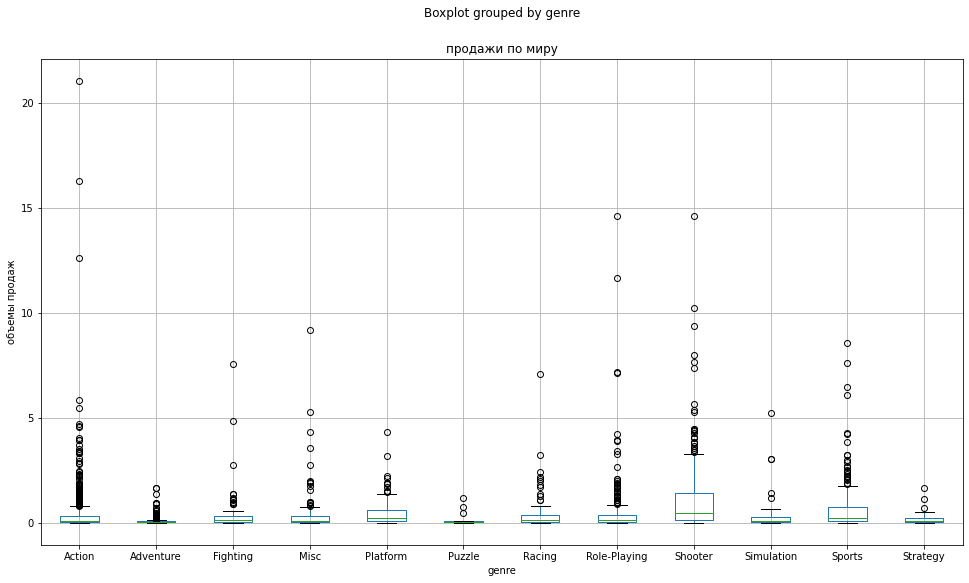

In [81]:
data_actual.boxplot('word_sales', by='genre',figsize=(16,9));
plt.title('продажи по миру')
plt.ylabel('объемы продаж');

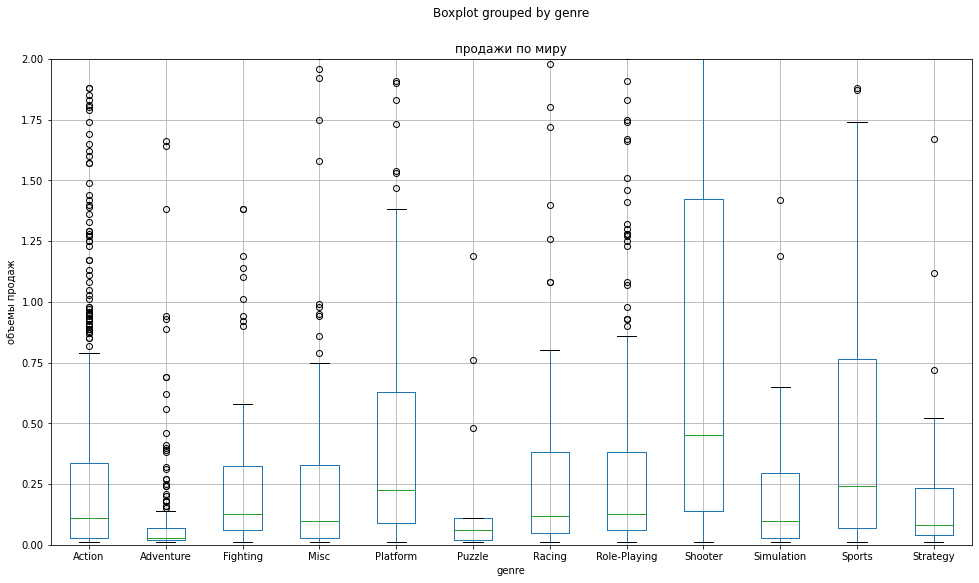

In [83]:
data_actual.boxplot('word_sales', by='genre',figsize=(16,9));
plt.ylim(0, 2)
plt.title('продажи по миру')
plt.ylabel('объемы продаж');

Больше всего продается игр жанра экшен, но это скорее всего связано с тем, что таких игр выпускается намного больше, потому, что средний уровень продаж по игре, достаточно низкий, а вот шутеры являются наибоее привлекательным жанром, поскольку и общие продажи велики, и уровень продаж на 1 выпущенную игру самый высокий. Так же можно выделить игры спортивного жанра, их показатели тоже достаточно высоки.

У остальных игр и общие и средние продажи оставляют желать лучшего, но особенно выделяются, в плохом смысле, игры стратегии, пазлы и приключения, их средний уровень продаж на самом низком уровне. 

**Общие результаты ИА:**
* Рынок переживает не лучшие времена, продажи идут на спад
* Среднее время жизни игровой платформы 7 лет, ПК является долгожителем и предпосылок к исчезновению данный платформы нет.
* Выделили актуальный период с 2013 года
* XOne,PS4,3DS являются явными фаворитами продаж, Х360 и PS3 в ближайшем будущем скорее всего уйдут с рынка.
* Игры выпускаемые различными платформами имеют примерно одинаковый уровень продаж внутри платформы, из крупных платформ игры на PS4 чаще становятся бестселлерами
* Оценки пользователей не влияют на продажи игр, но чаще наиболее продаваемые игры имеют высокую оценку.
* Игр жанра экшен выпускается больше всего, и всвязи с этим у этого жанра самые высокие продажи, но лучше обратить внимание на игры жанра шутер с высоки показателями как продажи на 1 игру, так и в целом выпуска.
* Игры с активном геймплеем в целом лучше продаются.

## Составим портрет пользователя по регионам

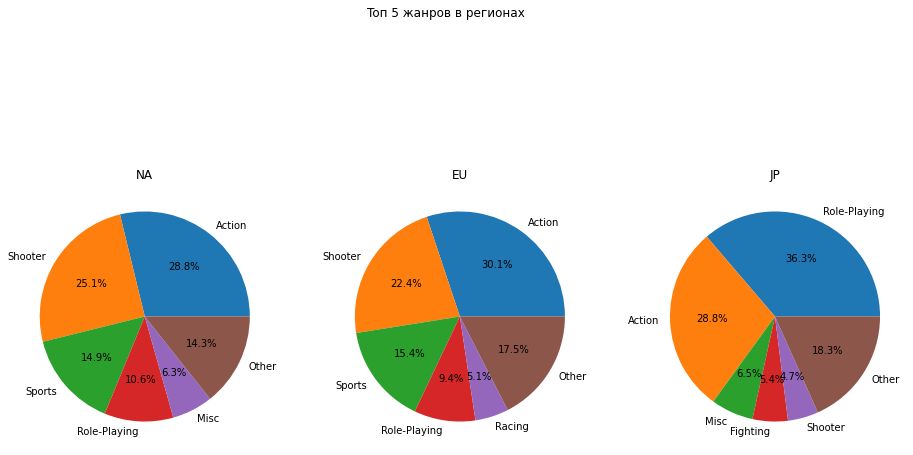

In [45]:
#Построим круговые диаграммы популярности жанров по регионам, топ 5
fields = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(12, 4))
for i, field in enumerate(fields):
    df = data_actual.groupby('genre')[field[1]].sum().sort_values(ascending=False)
    other = df[5:].sum()
    df = df[:5].copy()
    df['Other'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie',autopct='%1.1f%%', title=field[0], figsize=(16,9),fontsize=(10))
    plt.axis('off')
fig.suptitle("Toп 5 жанров в регионах");

Вкусы в Европе и Северной Америке очень схожи, и т.к. они занимают большую часть рынка совпадают с общим рейтингом популярности жанров, а вот Японские пользователи больше предпочитают RP жанр, и гораздо меньше заинтересованы в играх спортивной тематики.

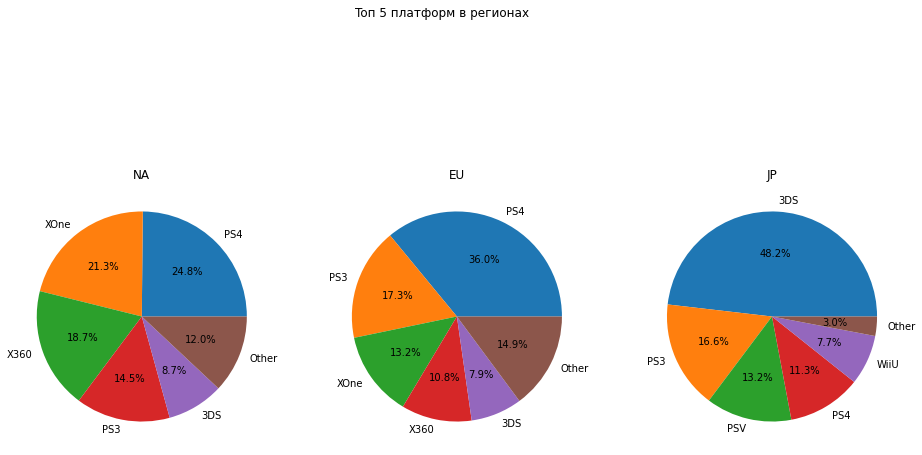

In [46]:
#Построим круговые диаграммы популярности платформ по регионам, топ 5
fields = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(12, 4))
for i, field in enumerate(fields):
    df = data_actual.groupby('platform')[field[1]].sum().sort_values(ascending=False)
    other = df[5:].sum()
    df = df[:5].copy()
    df['Other'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie',autopct='%1.1f%%', title=field[0], figsize=(16,9),fontsize=(10))
    plt.axis('off')
fig.suptitle("Toп 5 платформ в регионах");


В Северной Америке и Европе наиболее популярной платформой является PS4, но следущие позиции в Америки заняли платформы серии X. 

Японцы же практически в половине случаев выбирают 3DS, и платформы серии PS3/V/4, так же в топ 5 врывается платформа WiiU, а платформ серии X нет вовсе.

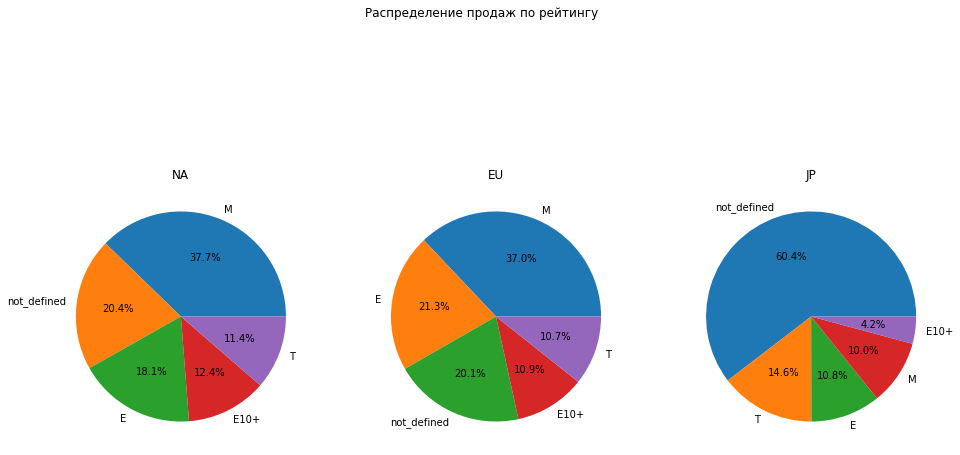

In [47]:
#Построим по круговым диаграмам распределние по рейтингу в регионах, топ 5
fields = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(12, 4))
for i, field in enumerate(fields):
    df = data_actual.groupby('rating')[field[1]].sum().sort_values(ascending=False)
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie',autopct='%1.1f%%', title=field[0], figsize=(16,9),fontsize=(10))
    plt.axis('off')
fig.suptitle("Распределение продаж по рейтингу");

Судя по круговым диаграмам, Американская и Европейская аудитория предпочитают игры для подростков, но сказать что рейтинг влияет на продажи в этих регионах нельзя, т.к. игры с неуказаным рейтингом, занимают не малую долю.
В Японии же игры с неуказанным рейтингом занимают наибольшую долю продаж, а остальные рейтинги занимают примерно равные доли.

Попробуем понять почему в Японии так популярны игры без возрастного рейтинга, т.к. вкусы японцев в целом отличаются от американских и европейских предположу, что это связано с платформами выпускающими такие игры. Так же проверю имеет ли это отношение к жанрам.

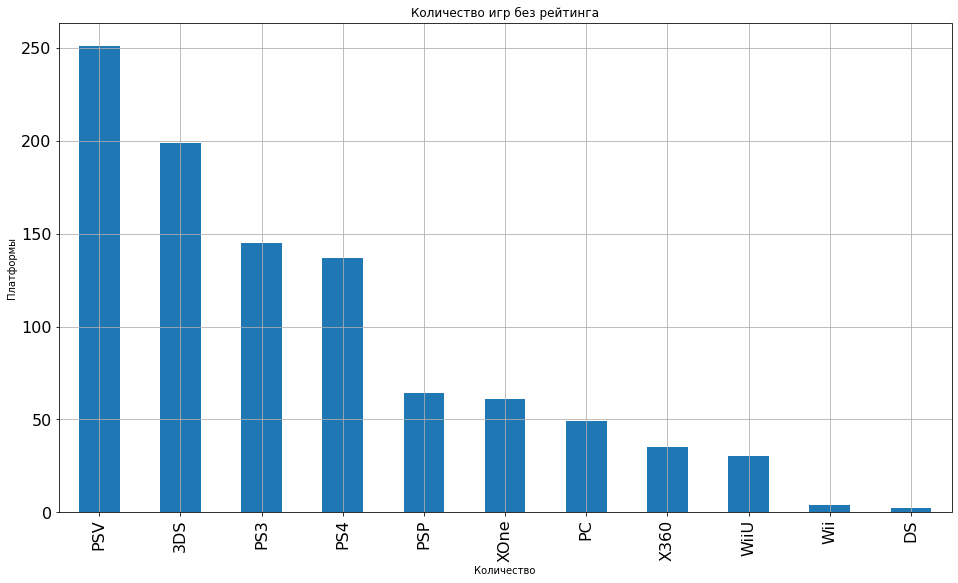

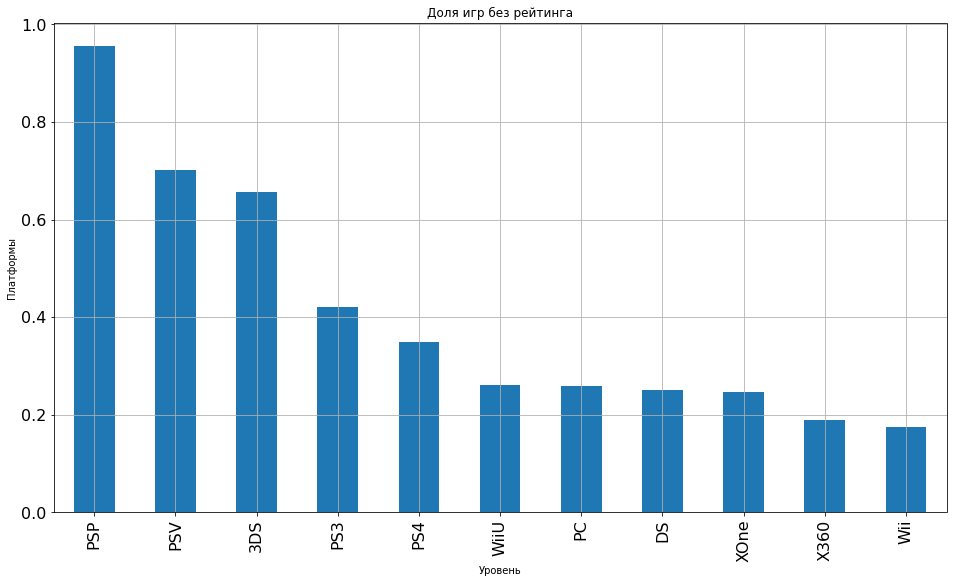

In [112]:
data_actual[(data_actual['rating']=='not_defined')].groupby('platform')['jp_sales'].count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(16, 9), fontsize=(16), grid=True);
plt.title('Количество игр без рейтинга')
plt.ylabel('Платформы')
plt.xlabel('Количество')
plt.show();
(data_actual[(data_actual['rating']=='not_defined')].groupby('platform')['jp_sales'].count()/\
 data_actual.groupby('platform')['jp_sales'].count()).sort_values(ascending=False)\
.plot(kind='bar', figsize=(16, 9), fontsize=(16), grid=True)
plt.title('Доля игр без рейтинга')
plt.ylabel('Доля')
plt.xlabel('Платформы');

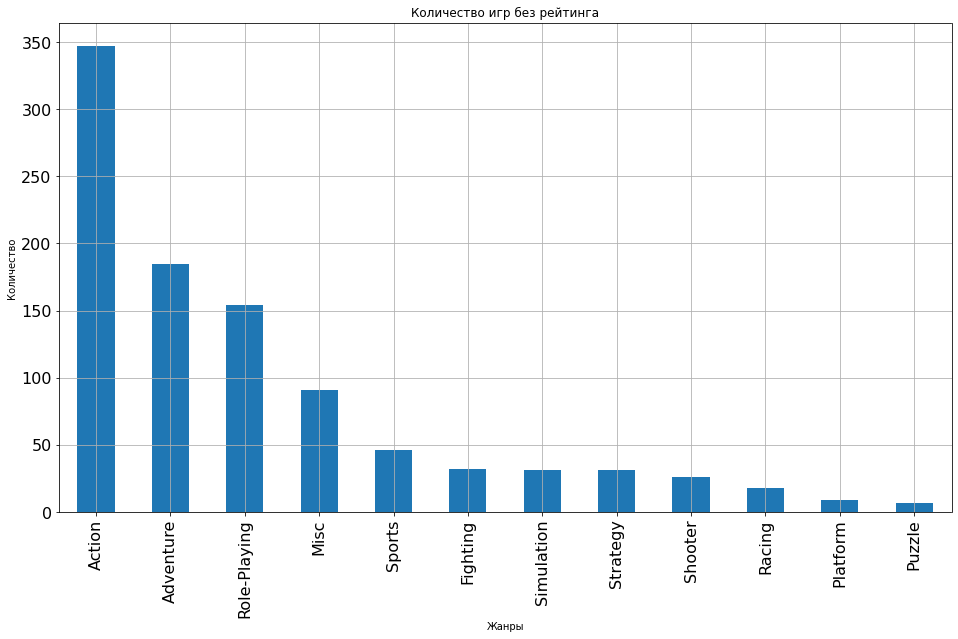

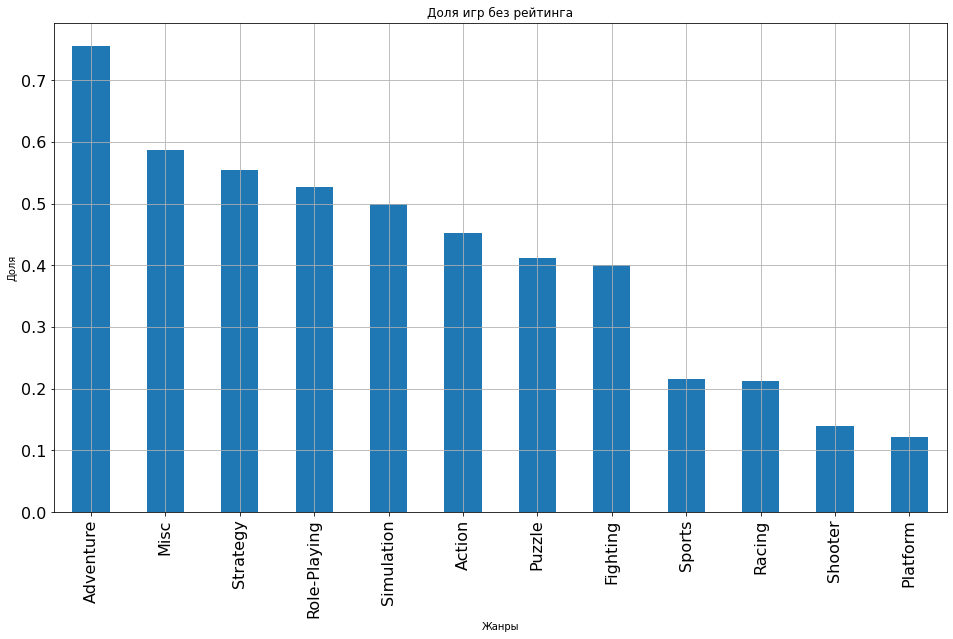

In [116]:
data_actual[(data_actual['rating']=='not_defined')].groupby('genre')['jp_sales'].count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(16, 9), fontsize=(16), grid=True);
plt.title('Количество игр без рейтинга')
plt.ylabel('Количество')
plt.xlabel('Жанры')
plt.show();
(data_actual[(data_actual['rating']=='not_defined')].groupby('genre')['jp_sales'].count()/\
 data_actual.groupby('genre')['jp_sales'].count()).sort_values(ascending=False)\
.plot(kind='bar', figsize=(16, 9), fontsize=(16), grid=True)
plt.title('Доля игр без рейтинга')
plt.ylabel('Доля')
plt.xlabel('Жанры');

Всетаки больше похоже, что причина кроется в платформах выпускающие такие игры, поскольку самые популярные в Японии игровые платформы имеют больше всего игр и самую высокую их долю, без рейтинга. Конечно дело может быть в культурных особенностях населения, но этого по имеющимся данным мы проверить не можем.

**Портрет пользователя по регионам**
* Северная америка: подросток играющий на PS4 и XOne, выбирающий игры с активным геймплеем например экшен или шутеры
* Европа: подросток играющий на PS4/3, выбирающий игры с активным геймплеем например экшен или шутеры
* Япония: человек играющий в RP игры на платформе 3DS, предпочитающий игры с неуказанным возрастным рейтингом.

## Проверим гипотезы об оценках пользователей на разных платформах, и жанрах

В качестве нулевых гипотез возьмем совпадение средних оценок пользователей в разных платформах и жанрах.
Следущего вида:

```
H₀: Средние пользовательские рейтинги платформ XboxOne и PC одинаковые
H₁: Средние пользовательские рейтинги платформ XboxOne и PC разные
alpha = 0.05
```

```
H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
H₁: Средние пользовательские рейтинги жанров Action и Sports разные
alpha = 0.05
```




In [31]:
# results = вызов метода для проверки гипотезы
results =st.ttest_ind(
    data_actual.loc[(data_actual['platform'] =='XOne')&(data_actual['user_score'] !=-1),'user_score'], 
    data_actual.loc[(data_actual['platform'] =='PC')&(data_actual['user_score'] !=-1),'user_score'],equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [30]:
# results = вызов метода для проверки гипотезы
results =st.ttest_ind(
    data_actual.loc[(data_actual['genre'] =='Action')&(data_actual['user_score'] !=-1),'user_score'], 
    data_actual.loc[(data_actual['genre'] =='Sports')&(data_actual['user_score'] !=-1),'user_score'],equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Результаты:**
* игры на платформах XOne и PC скорее всего имеют одинаковый рейтинг
* игры жанров Action и Sports имеют различный рейтинг

## Общий вывод

* Данные с которыми нужно работать имели не очень высокое качество
* Рынок игр идет на спад
* Платформы PS4,3DS и XOne являются наиболее перспективными для дальнейшей работы
* Оценки пользователей и критиков напрямую не влияют на уровень продаж в играх
* Наиболее перспективными являются жанры экшен и шутер, если рассматривать общемировую статистику, в Японии же популярен жанр RP
* Игры для подростков наиболее популярны в Европе и Америке, в Японии же предпочитают игры без возрастного рейтинга


**Наиболее интересной с точки зрения продаж можно считать игру:**
* в жанрах Shoter/Sport
* с рейтингом M
* на платформе PS4 или XOne
* высокой оценкой пользователя